# Dataset preparation

In [2]:
import pandas as pd

In [3]:
def read_source_csv(folder_path):
    adhd_df = pd.read_csv(folder_path + '/adhd.csv')
    aspergers_df = pd.read_csv(folder_path + '/aspergers.csv')
    depression_df = pd.read_csv(folder_path + '/depression.csv')
    ocd_df = pd.read_csv(folder_path + '/ocd.csv')
    ptsd_df = pd.read_csv(folder_path + '/ptsd.csv')

    # join everything together with a new column for the label
    adhd_df['SubReddit'] = 'adhd'
    aspergers_df['SubReddit'] = 'aspergers'
    depression_df['SubReddit'] = 'depression'
    ocd_df['SubReddit'] = 'ocd'
    ptsd_df['SubReddit'] = 'ptsd'

    return pd.concat([adhd_df, aspergers_df, depression_df, ocd_df, ptsd_df])

def read_clean_csv(file_path):
    return pd.read_csv(file_path)

In [4]:
dd = pd.read_csv('Dataset/dataset.csv')
# Display number of rows 
print(dd.shape[0])
#display number of different authors
print(dd['author'].nunique())

87078
50750


In [5]:
df = read_clean_csv('Dataset/dataset.csv')

# Print the number of rows of the dataset
print(df.shape[0])

87078


## Cleaning the data

In [6]:
# Drop NaN values
df = df.dropna()

# Drop removed bodies
df = df[df['body'] != '[removed]']
df = df[df['body'] != '[deleted]']

#change column name 'created_utc' to 'creation_date'
df.rename(columns={'created_utc': 'creation_date'}, inplace=True)
#change the date format to contain only the date, knowing that the date is in the format 2021-12-22T18:32:56.000Z
df['creation_date'] = df['creation_date'].str.split('T').str[0]

print(df.head())

                author                                               body  \
0  HotConversation1273  A few months ago I was accepted into this full...   
1           snorefestt  Hey guys, I was curious if anyone else has the...   
2               etyf12   \n\ni have 6 exams in the next 2 weeks one of...   
3    GetHairOrDieTryin  Is there anyone out there that is struggling w...   
4         ZeroTransPat  Whenever I get hungry, I never eat because I d...   

  creation_date      id  num_comments  score subreddit  \
0    2021-12-22  rmbjwb             1      1      ADHD   
1    2021-12-22  rmbd1y             3      5      ADHD   
2    2021-12-22  rmbbvu             1      2      ADHD   
3    2021-12-22  rmba1t             3      2      ADHD   
4    2021-12-22  rmb8lm             2      1      ADHD   

                                               title  upvote_ratio  \
0    I get extremely anxious if I’m not working 24/7           1.0   
1  I can't will myself to clean my own house, bu

In [7]:
print(df.shape[0])
# Create a new .csv file with the cleaned data 'df' named dataset.csv, in the folder 'Dataset'
df.to_csv('Dataset/dataset.csv', index=False)

# Create a new json file with the cleaned data 'df' named dataset, in the folder 'Dataset'
df.to_json('Dataset/dataset.json', orient='records', lines=True)


87078


In [8]:
# Get most used words in the body column

from collections import Counter
import re

# Get the most used words in the body column
def get_most_used_words(df, n):
    # Get all the words in the body column
    all_words = ' '.join(df['body']).split()
    # Count the number of times each word appears
    word_counts = Counter(all_words)
    # Get the n most common words
    return word_counts.most_common(n)

# Get the 10 most used words in the body column and their counts
most_used_words = get_most_used_words(dd, 10)
print(most_used_words)

[('I', 780883), ('to', 497315), ('and', 470997), ('the', 344901), ('a', 313986), ('my', 286408), ('of', 235965), ('that', 187469), ('it', 166669), ('in', 162608)]


In [9]:
# Get the most used words in the body column that are not stop words
import nltk
from nltk.corpus import stopwords

# Get the most used words in the body column that are not stop words
def get_most_used_words_without_stop_words(df, n):
    # Get all the words in the body column
    all_words = ' '.join(df['body']).split()
    # Get the stop words
    stop_words = set(stopwords.words('english'))
    # Count the number of times each word appears
    word_counts = Counter(all_words)
    # Get the n most common words that are not stop words
    return [(word, count) for word, count in word_counts.most_common() if word not in stop_words][:n]

# Get the 10 most used words in the body column that are not stop words and their counts
most_used_words_without_stop_words = get_most_used_words_without_stop_words(dd, 10)
print(most_used_words_without_stop_words)


[('I', 780883), ('like', 100192), ("I'm", 72604), ('feel', 71337), ('get', 58813), ('I’m', 55238), ('know', 54750), ('really', 44438), ('want', 42627), ('even', 41948)]


['November', 'December', 'October', 'August', 'July', 'September', 'June', 'May', 'April', 'March', 'February', 'January']


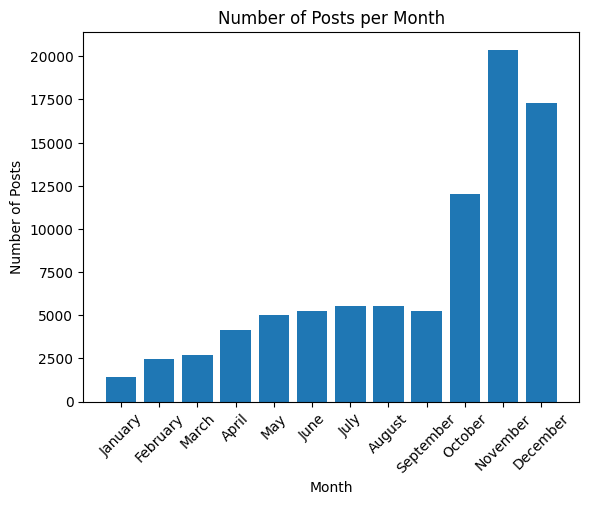

In [10]:
# Get the month/year combos with the most posts
import calendar

# Get the months with the most posts
def get_months_with_most_posts(df):
    # Get the month of each post
    months = df['creation_date'].str.split('-').str[1]
    # Count the number of posts for each month
    month_counts = Counter(months)
    # Get the months with the most posts
    return [calendar.month_name[int(month)] for month, _ in month_counts.most_common()]

# Get the months with the most posts
months_with_most_posts = get_months_with_most_posts(dd)
print(months_with_most_posts)

# plot it
import matplotlib.pyplot as plt

# Get the number of posts for each month
months = dd['creation_date'].str.split('-').str[1]
month_counts = Counter(months)
# Get the months
months = [calendar.month_name[int(month)] for month, _ in month_counts.items()]
months.reverse()
# Get the number of posts
counts = list(month_counts.values())
counts.reverse()
# Plot the number of posts for each month in month calendar order
plt.bar(months, counts)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('Number of Posts per Month')
plt.show()


In [11]:
# Get the years in order of most posts
def get_years_in_order_of_most_posts(df):
    # Get the year of each post
    years = df['creation_date'].str.split('-').str[0]
    # Count the number of posts for each year
    year_counts = Counter(years)
    # Get the years in order of most posts
    return [year for year, _ in year_counts.most_common()]

# Get the years in order of most posts
years_in_order_of_most_posts = get_years_in_order_of_most_posts(dd)
print(years_in_order_of_most_posts)

['2021', '2020', '2019']


In [12]:
# Get the max, min, mode, and mean of the number of comments
max_comments = dd['num_comments'].max()
min_comments = dd['num_comments'].min()
mode_comments = dd['num_comments'].mode()
mean_comments = dd['num_comments'].mean()
print(max_comments, min_comments, mode_comments, mean_comments)

2944 0 0    1
Name: num_comments, dtype: int64 8.885275270447185


In [13]:
# Get some stats about the upvote ratio

min_ratio = dd['upvote_ratio'].min()
mean_ratio = dd['upvote_ratio'].mean()

print(min_ratio, mean_ratio)

0.08 0.9373834952571259


In [14]:
# Number of unique values per column
unique_counts = dd.nunique()

# Missing values per column
missing_values = dd.isnull().sum()

# Value counts for categorical columns
author_counts = dd['author'].value_counts()
subreddit_counts = dd['subreddit'].value_counts()
subreddit_counts = dd['SubReddit'].value_counts()

# Display the results
print("\nNumber of Unique Values per Column:\n", unique_counts)
print("\nMissing Values per Column:\n", missing_values)
print("\nAuthor Counts:\n", author_counts)
print("\nSubreddit Counts:\n", subreddit_counts)


Number of Unique Values per Column:
 author           50750
body             86607
creation_date      879
id               87078
num_comments       420
score              983
subreddit            5
title            83648
upvote_ratio        82
url              87078
SubReddit            5
dtype: int64

Missing Values per Column:
 author           0
body             0
creation_date    0
id               0
num_comments     0
score            0
subreddit        0
title            0
upvote_ratio     0
url              0
SubReddit        0
dtype: int64

Author Counts:
 author
[deleted]            3772
urbanracer34          110
BBlank223              91
Infinite_Tax_6567      78
turquoiseturtle01      77
                     ... 
crappy_bob              1
rationedtoast           1
skemez1                 1
PiNe__ApP-LE            1
WineInTheTub            1
Name: count, Length: 50750, dtype: int64

Subreddit Counts:
 SubReddit
ocd           25646
adhd          20398
depression    13884
ptsd

In [16]:
def get_mean_stats_per_subreddit(df):
    # Get the mean number of comments, upvote ratio, and score for each subreddit
    return df.groupby('SubReddit')[['num_comments', 'upvote_ratio', 'score']].mean()

# Get the mean number of comments, upvote ratio, and score for each subreddit
mean_stats_per_subreddit = get_mean_stats_per_subreddit(dd)
print(mean_stats_per_subreddit)


            num_comments  upvote_ratio      score
SubReddit                                        
adhd           13.975782      0.943061  40.788901
aspergers      16.475953      0.891548  38.509403
depression      3.153414      0.945322   9.965140
ocd             4.823793      0.957641  10.858068
ptsd            7.263634      0.927971  16.727897
